# Unsupervised Kernel Methods

Course: Machine Learning II, Data Science Master (Universidad de Cantabria - UIMP).  
Lecturers: Steven Van Vaerenbergh, Ignacio Santamaria.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# inline plots
%matplotlib inline

# use seaborn plotting defaults
import seaborn as sns; sns.set()

# Kernel PCA

Kernel PCA is the extension of PCA to the kernel feature space.

Typical applications of kernel PCA include:
- Nonlinear dimensionality reduction
- Nonlinear correlation analysis
- Noise reduction

## Algorithm

1. Obtain the kernel matrix ${\bf K}$ with entries $\kappa({\bf x}_i, {\bf x}_j)$
2. Center the matrix ${\bf K}_c = \left({\bf I} - {\bf 1}{\bf 1}^T\right) {\bf K} \left({\bf I} -{\bf 1}{\bf 1}^T \right)$
3. $[{\bf V}, \boldsymbol{\Lambda}] = {\rm eig}({\bf K}_c)$
4. $\boldsymbol{\alpha}_j = \lambda_j^{-1/2} {\bf v}_j$, $j= 1,\ldots,r$
5. for $i=1:n$
    - ${\bf k}_i = \begin{bmatrix} \kappa({\bf x}_i, {\bf x}_1) & \ldots &  \kappa({\bf x}_i, {\bf x}_n) \end{bmatrix}^T$
    - ${\bf y}_i = \begin{bmatrix} \boldsymbol{\alpha}_1^T {\bf k}_i& \ldots &  \boldsymbol{\alpha}_r^T {\bf k}_i \end{bmatrix}^T $

## scikit-learn implementation

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

# Part 1. Kernel PCA for dimensionality reduction

## Two circles data set

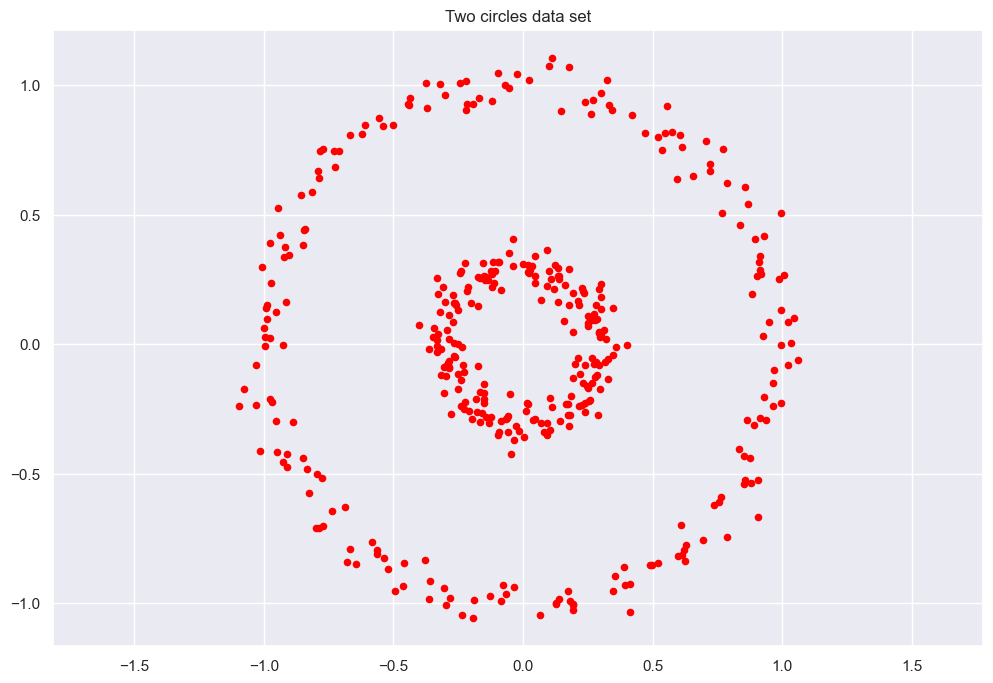

In [2]:
from sklearn.datasets import make_circles

np.random.seed(0)

X_circles, y_circles = make_circles(n_samples=400, factor=.3, noise=.05)

# Plot data
[X, y] = [X_circles, y_circles]
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], s=20, c="red");
plt.title("Two circles data set")
plt.axis('equal');

## KPCA on circles data

Now let us apply KPCA on the generated data

C:\Users\migue\AppData\Local\Temp\ipykernel_8404\2975157649.py:24: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  cs.collections[0].set_label('KPCA isolines')


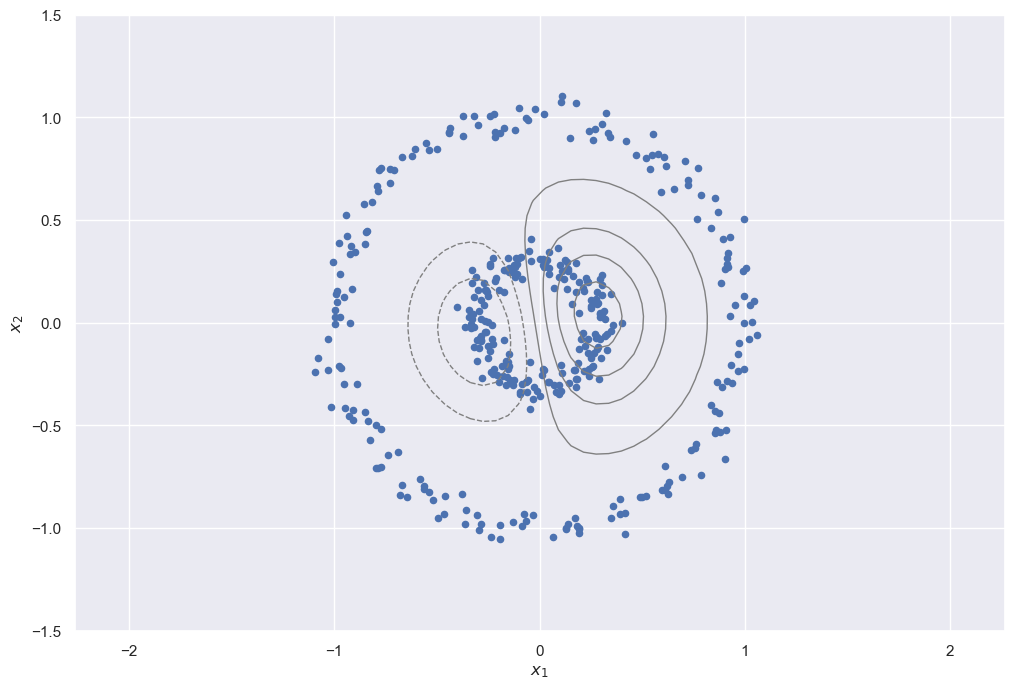

KernelPCA(gamma=10, kernel='rbf', n_components=10)

In [56]:
from sklearn.decomposition import KernelPCA

# Complete the code: transform the circles data into X_kpca using an RBF kernel with gamma=10
X = X_circles
kpca = KernelPCA(n_components=10,kernel='rbf',gamma=10)
X_kpca = kpca.fit_transform(X)

# Plot results
plt.figure(figsize=(12,8))
plt.axis('equal')

plt.scatter(X[:, 0], X[:, 1], s=20, label='data')

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# grid of test data
X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
cs = plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')
cs.collections[0].set_label('KPCA isolines')

# plt.legend()
plt.show()

kpca

In gray, we have plotted the contours of constant projection onto the first principal direction.

In [7]:
print('First 5 eigenvalues: {}'.format(kpca.eigenvalues_[0:5]))

First 5 eigenvalues: [42.7395692  40.45722555 40.08508031 17.15694279 16.93235579]


Now let us plot the contours of constant projection onto the principal directions 1 to 6.

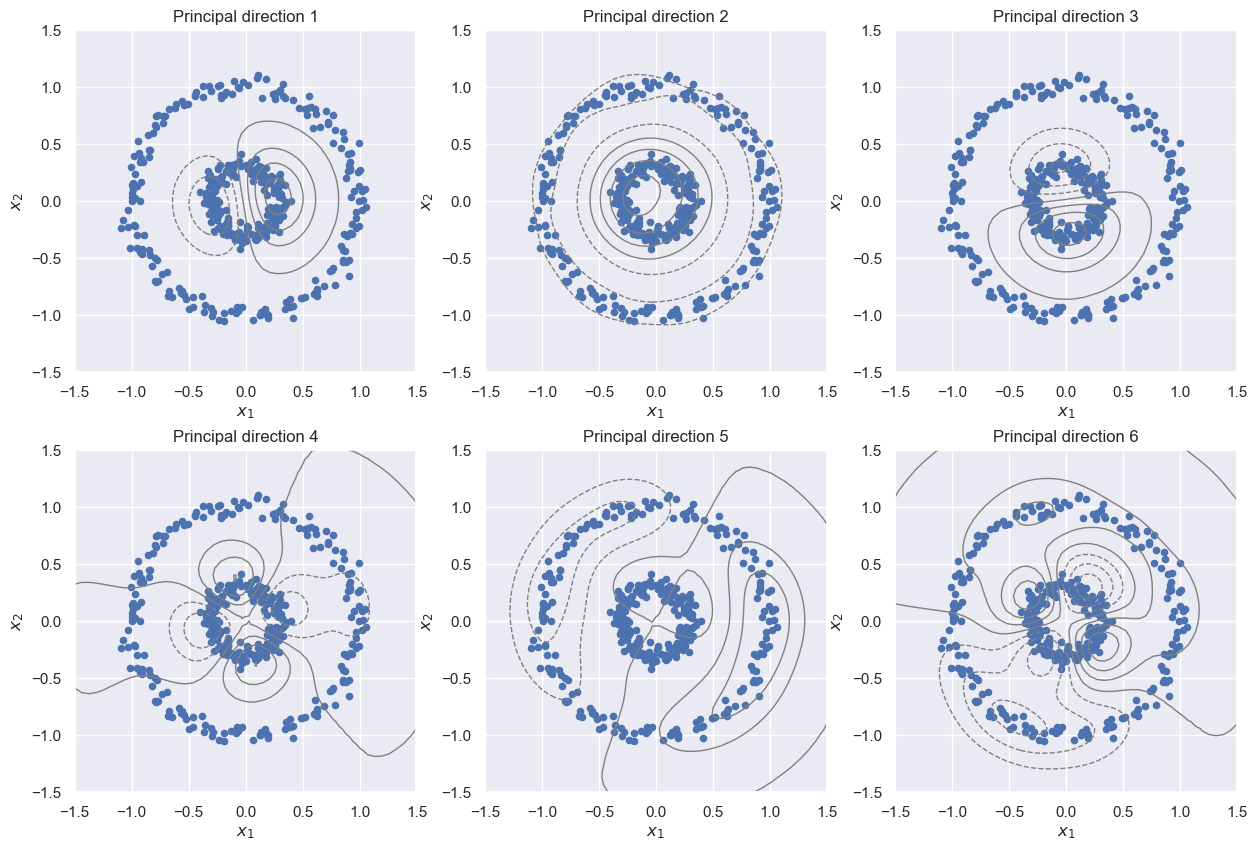

In [8]:
# Plot results

plt.figure(figsize=(15,10))

for i in np.arange(0,6):
    plt.subplot(2, 3, i+1, aspect='equal')
    plt.title("Principal direction %d"%(i+1))

    plt.scatter(X[:, 0], X[:, 1], s=20)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

    X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
    X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

    # projection on the first principal component (in the phi space)
    Z_grid = kpca.transform(X_grid)[:, i].reshape(X1.shape)
    plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.show()

We can add some color to visualize the contour lines better:

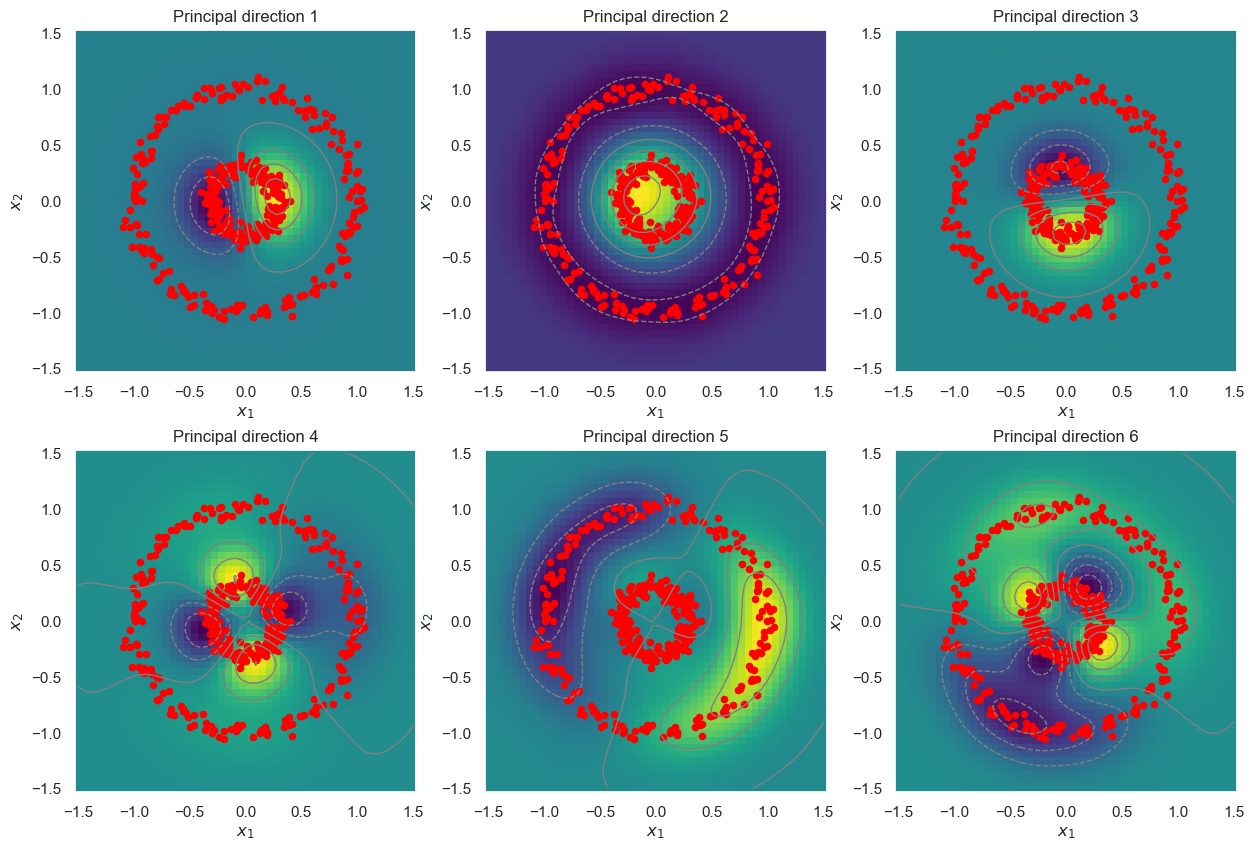

In [9]:
# Plot results

plt.figure(figsize=(15,10))

for i in np.arange(0,6):
    plt.subplot(2, 3, i+1, aspect='equal')
    plt.title("Principal direction %d"%(i+1))

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")

    X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
    X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T

    # projection on the first principal component (in the phi space)
    Z_grid = kpca.transform(X_grid)[:, i].reshape(X1.shape)
    plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')
    
    plt.pcolormesh(X1, X2, Z_grid, shading='nearest', cmap = 'viridis')

    plt.scatter(X[:, 0], X[:, 1], c="red", s=20)
    
plt.show()

Let us have a closer look at the retrieved components. We will plot component 1 vs component 2:

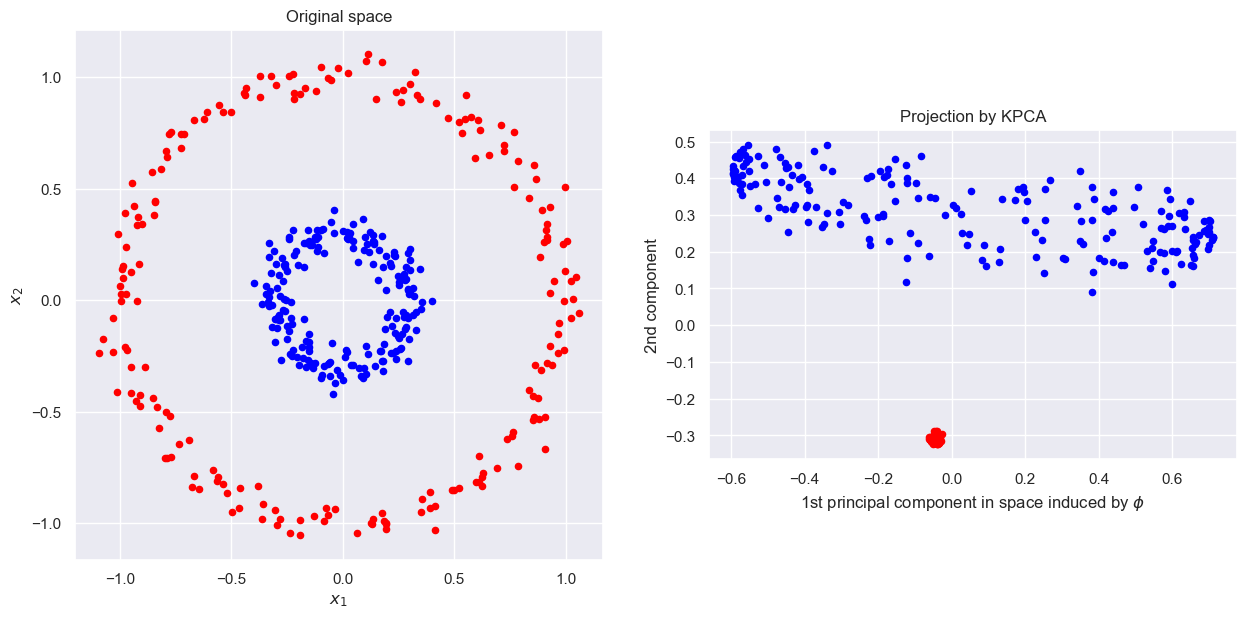

In [10]:
plt.figure(figsize=(15,7))
plt.subplot(1, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X_circles[reds, 1], c="red", s=20)
plt.scatter(X[blues, 0], X_circles[blues, 1], c="blue", s=20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplot(1, 2, 2, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20)
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue", s=20)
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.show()

# Part 2. KPCA for Denoising

As a dimensionality reduction technique, KPCA allows to recover the nonlinear manifold that underlies a given data set.
The manifold is spanned by a limited set of (kernel) principal directions, and by projecting the data onto this manifold it becomes possible to remove components of the data that contain mostly noise. 

We will apply KPCA for some simple denoising problem in the following examples. First, we define two data sets.

## Noisy square data set

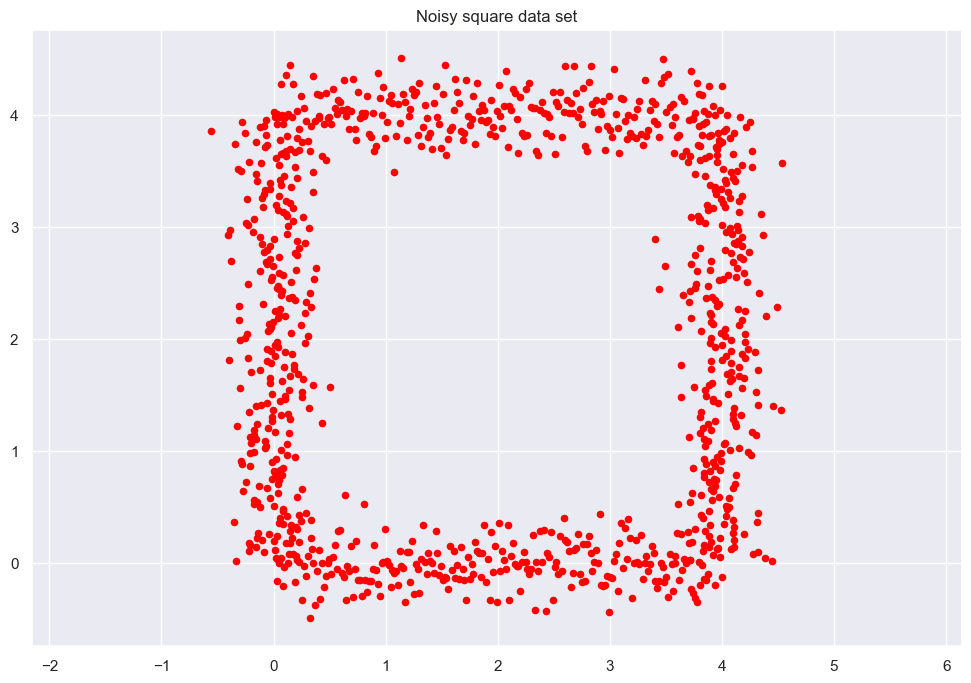

In [13]:
def noisy_square(points=1000, length=4, noise=None, *args, **kwargs):
    """
    Generates syntethic data in the shape of a square.
    Arguments:
        points: number of points in the generated dataset.
        noise: name of the distribution to be used as additive noise.
               Use one of the distribution from numpy.random, see
               https://docs.scipy.org/doc/numpy-1.10.0/reference/routines.random.html
               Default is 'uniform', with low=-0.5 and high=0.5. Noise is added
               in the direction orthogonal to the current side.
        args, kwargs: Any arguments you want to pass to the corresponding
                      numpy.random sampling function, except size.
    Returns:
        Arrays with the X and Y coordinates for the new data.
    """
    if noise is None:
        noise = 'uniform'
        kwargs['low'] = -0.5
        kwargs['high'] = 0.5
    kwargs['size'] = points // 4
    dist = getattr(np.random, noise)

    real_values = np.linspace(0, length, num=points//4)
    x_values = []
    y_values = []
    # Left side
    x_values.append(dist(*args, **kwargs))
    y_values.append(real_values)
    # Right side
    x_values.append(dist(*args, **kwargs) + length)
    y_values.append(real_values)
    # Top side
    x_values.append(real_values)
    y_values.append(dist(*args, **kwargs) + length)
    # Bottom side
    x_values.append(real_values)
    y_values.append(dist(*args, **kwargs))
    
    X = np.hstack((np.array(x_values).reshape(-1,1),np.array(y_values).reshape(-1,1)))
    
    return X

X_square = noisy_square(noise='normal', scale=0.2)

# Plot data
X = X_square
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], s=20, c="red");
plt.title("Noisy square data set")
plt.axis('equal');

We will apply KPCA, project the data onto a limited number of principal directions in feature space.
Then, we apply the inverse transform to obtain pre-images of the data in the input space.

For the inverse transform we will use the method from the paper by Mika et al. [1] as it produces better results than the function included in scikit-learn.

[1] Mika, S., Schölkopf, B., Smola, A., Müller, K. R., Scholz, M., & Rätsch, G. (1998). Kernel PCA and de-noising in feature spaces. Advances in neural information processing systems, 11.

In [14]:
# Alternative function for obtaining preimages, based on the paper by Mika et al.

def obtain_preimages(X, gammas):
    """
    :return: pre-images of each X[i,:], that is z that minimizes |rho(z) -
                Pn·rho(x)|^2, using eq. (10) from the paper by Mika et al.
    """
    
    Z = []
    for i in range(X.shape[0]):
        # Find z, pre-image
        z_new = X[i, :]

        z = np.zeros(z_new.shape)
        n_iter = 0
        # Convergence criteria, there might be different options
        while (np.linalg.norm(z - z_new) > 0.00001) and (n_iter < 1e3):
            z = z_new
            zcoeff = gammas[i, :] * kpca._get_kernel([z],X)
            s = np.sum(zcoeff)
            zcoeff = np.sum(X*zcoeff.T, axis=0)
            # Avoid underflow
            if s == 0:
                s += 1e-8
            z_new = zcoeff/s
            n_iter += 1
        if np.array_equal(z_new, X[i, :]):
            import pdb
            pdb.set_trace()

        Z.append(z)
    return np.array(Z)

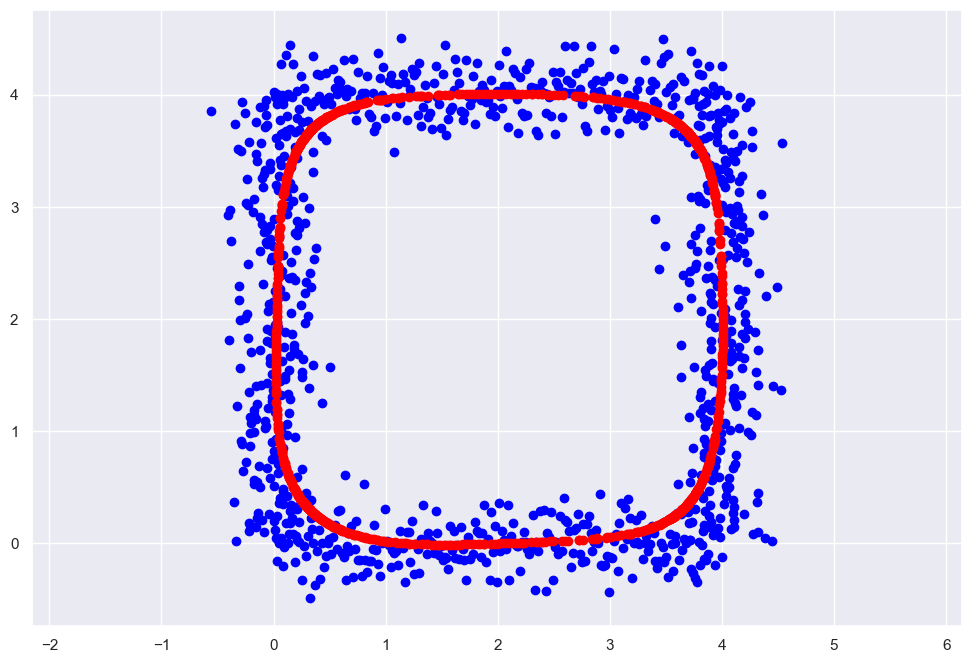

In [15]:
# select data
X = X_square

# set parameters
n_components = 4
gamma = 1

# run kernel PCA
kpca = KernelPCA(n_components=n_components, kernel="rbf", gamma=gamma)
X_kpca = kpca.fit_transform(X)

# calculate gammas, as used in eq. (6) from Mika et al.
gammas = np.dot(X_kpca, kpca.eigenvectors_.T)

# obtain pre-images
X_pre = obtain_preimages(X, gammas)

# plot the result
plt.figure(figsize=(12,8))
plt.scatter(X[:,0],X[:,1],color='blue')
plt.scatter(X_pre[:,0],X_pre[:,1],color='red')
plt.axis('equal')
plt.show()

# Part 2. Spectral Clustering

The scikit-learn implementation of spectral clustering can be found here: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

## Two moons data set

In [22]:
from sklearn import cluster
from sklearn.cluster import SpectralClustering
import numpy as np

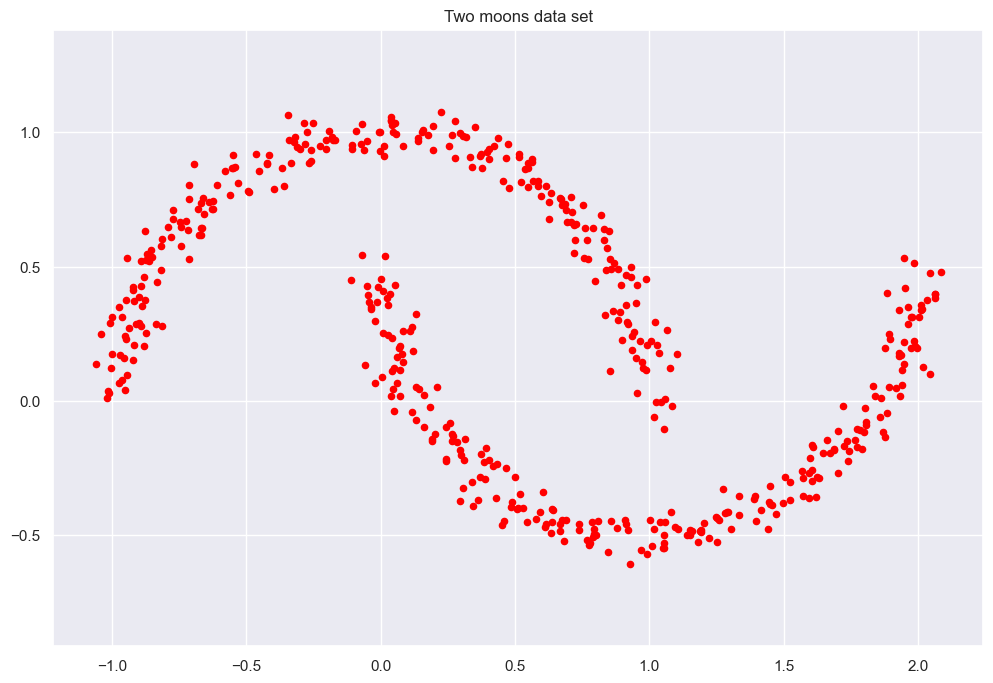

In [17]:
n_samples = 500

X_moons, y_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

# Plot data
[X, y] = [X_moons, y_moons]
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], s=20, c="red");
plt.title("Two moons data set")
plt.axis('equal');

## Exercise 1: Clustering of Circles and Two Moons data

1. Apply K-means and Spectral Clustering to find 2 clusters in the circles and two moons data sets.
2. Plot the results of each clustering.

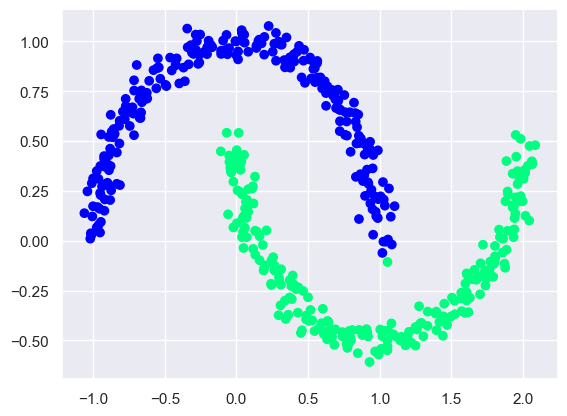

In [106]:
clustering = SpectralClustering(n_clusters=2, affinity='rbf', random_state=0, gamma=14).fit(X_moons)
plt.scatter(X_moons[:,0],X_moons[:,1],c=clustering.labels_, cmap='winter')

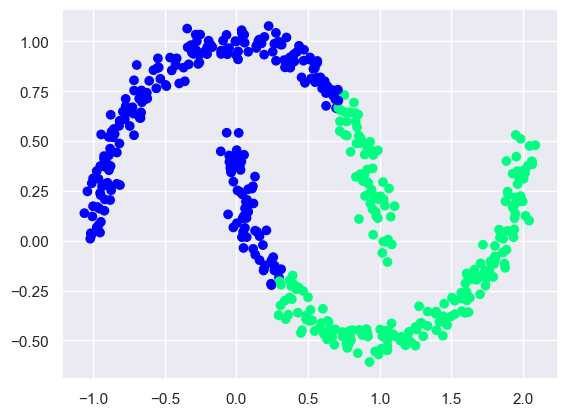

In [46]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0,n_init="auto").fit(X_moons)
plt.scatter(X_moons[:,0],X_moons[:,1],c=km.labels_, cmap='winter')

# Part 4: Kernel PCA and Spectral Clustering on the Water Flow data set

## Data set description

The data set "Water Flow" represents the hourly measurements (in $m^3/h$) of the water flow in one node of a distribution network. Each row of the CSV file contains the water flow time series for a single day, consisting in 24 points that correspond to the hours of the day.

In [60]:
data_path = 'water_flow.csv'
df = pd.read_csv(data_path, delimiter=';')

# Extracting the time series data, excluding the date column
X = df.drop('fecha', axis=1)

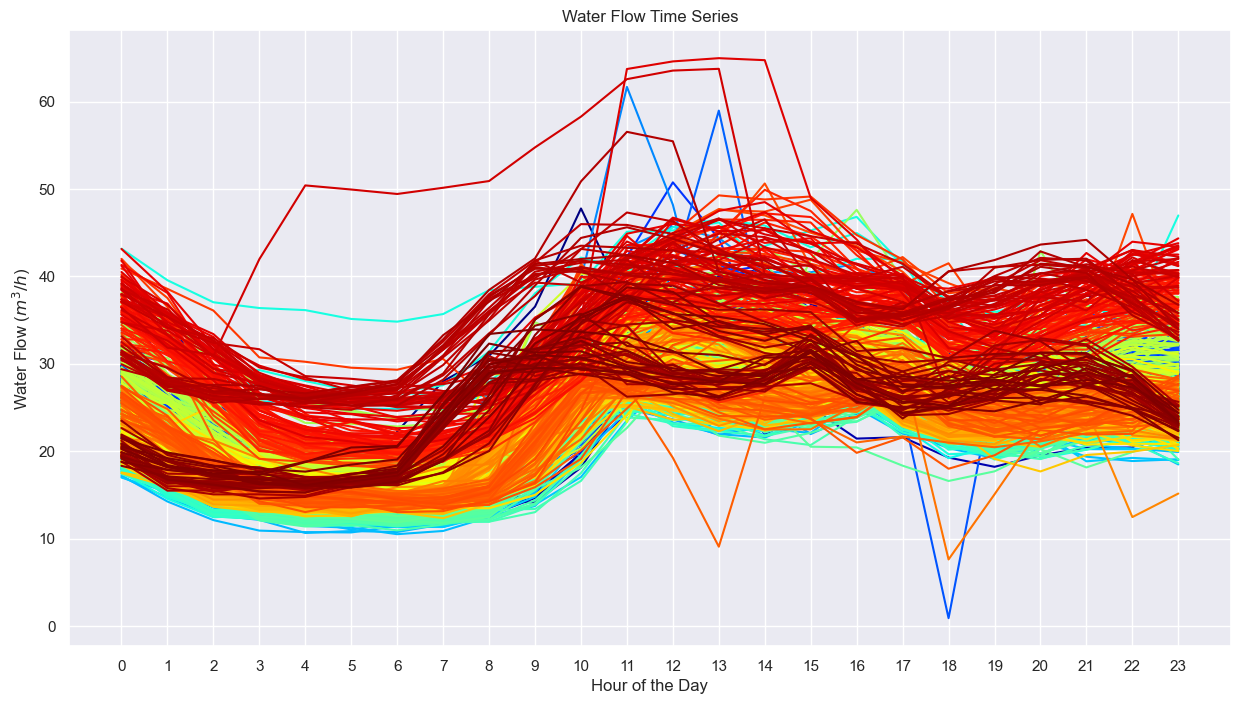

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Set the figure size for better visibility
plt.figure(figsize=(15, 8))

# Number of time series
num_series = len(X)

# Generate a list of colors
colors = plt.cm.jet(np.linspace(0, 1, num_series))

# Plot each time series
for i, (index, row) in enumerate(X.iterrows()):
    plt.plot(row, color=colors[i])

plt.title('Water Flow Time Series')
plt.xlabel('Hour of the Day')
plt.ylabel('Water Flow ($m^3/h$)')
plt.show()

## Exercise 2: Outlier detection and clustering on the Water Flow data set

1. Use PCA and Kernel PCA to detect outliers
    1. Apply PCA and Kernel PCA
    2. Anomaly Detection
    3. Visualization and discussion
2. Use K-means and Spectral Clustering to cluster the data  
    1. Determine an adequate number of clusters
    2. Apply both clustering techniques
    3. Visualization and discussion

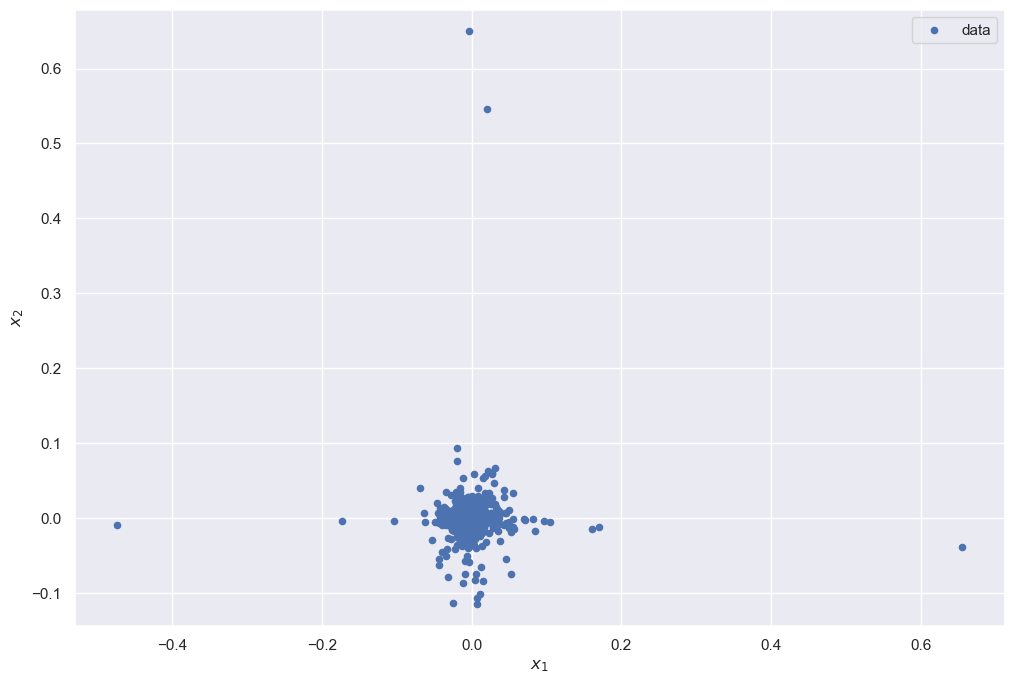

KernelPCA(gamma=10, kernel='rbf', n_components=50)

In [69]:
# 1.A Apply PCA and Kernel PCA

kpca = KernelPCA(n_components=50,kernel='rbf',gamma=10)
X_kpca = kpca.fit_transform(X)
xtilde = X_kpca[:, 0]
ytilde = X_kpca[:, 1]

# Plot results
plt.figure(figsize=(12,8))
plt.axis('equal')

plt.scatter(xtilde, ytilde, s=20, label='data')



plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.legend()
plt.show()

kpca

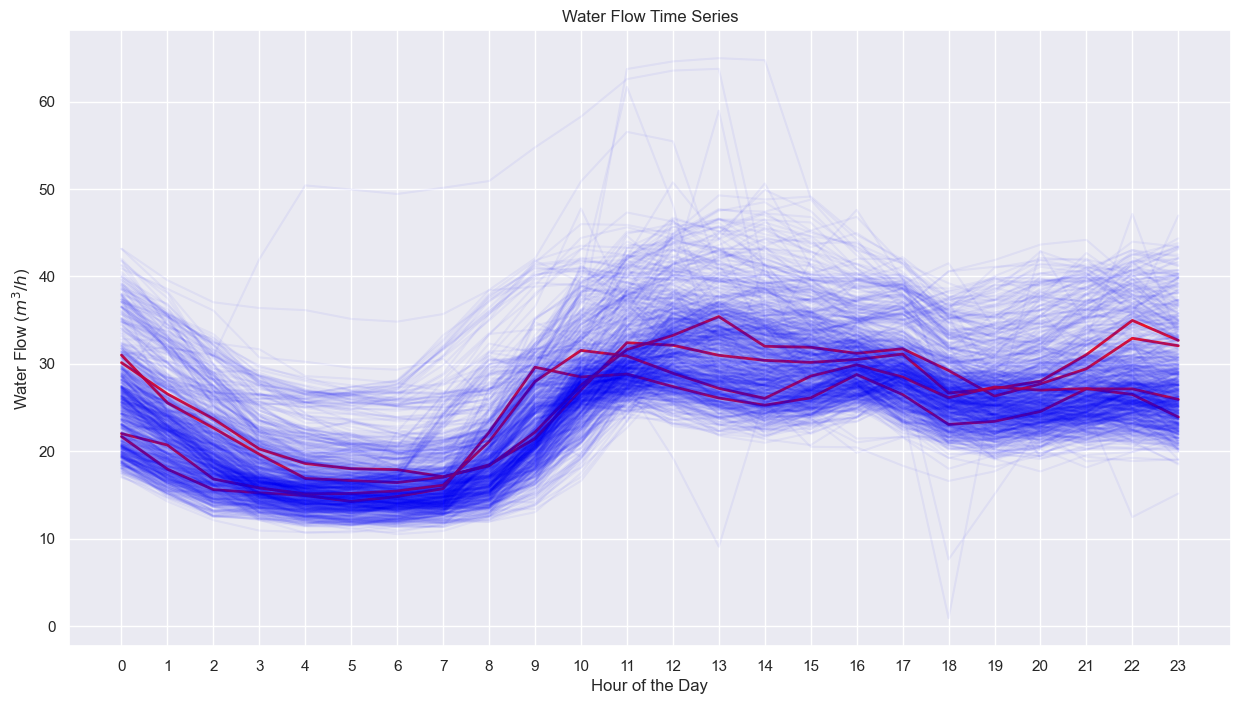

In [105]:
# 1.B Anomaly Detection

indout = np.sqrt(xtilde**2+ytilde**2) > 0.2
plt.figure(figsize=(15, 8))


# Plot each time series
for i, (index, row) in enumerate(X.iterrows()):
    if indout[i]:
        plt.plot(row, color='red',alpha=0.9,linewidth = 2)
    else:
        plt.plot(row, color='blue',alpha=0.05)

plt.title('Water Flow Time Series')
plt.xlabel('Hour of the Day')
plt.ylabel('Water Flow ($m^3/h$)')
plt.show()

In [ ]:
# 1.C Visualization and discussion



In [ ]:
# 2.A Determine an adequate number of clusters


In [111]:
# 2.B Apply both clustering techniques

clustering2 = SpectralClustering(n_clusters=5, affinity='rbf', random_state=0, gamma=10).fit(X)

C:\Users\migue\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\migue\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 744 with accuracies 
[2.98936074e-06 4.25456738e-06 1.24848396e-05 3.47782582e-05
 1.13910436e-05 1.57407928e-04]
not reaching the requested tolerance 1.2263655662536621e-05.
Use iteration 722 instead with accuracy 
3.677310732534729e-05.

  _, diffusion_map = lobpcg(
C:\Users\migue\miniconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited postprocessing with accuracies 
[2.99852287e-06 4.03510278e-06 9.90102865e-06 2.66309751e-05
 1.75341787e-05 1.59538810e-04]
not reaching the requested tolerance 1.2263655662536621e-05.
  _, diffusion_map = lobpcg(


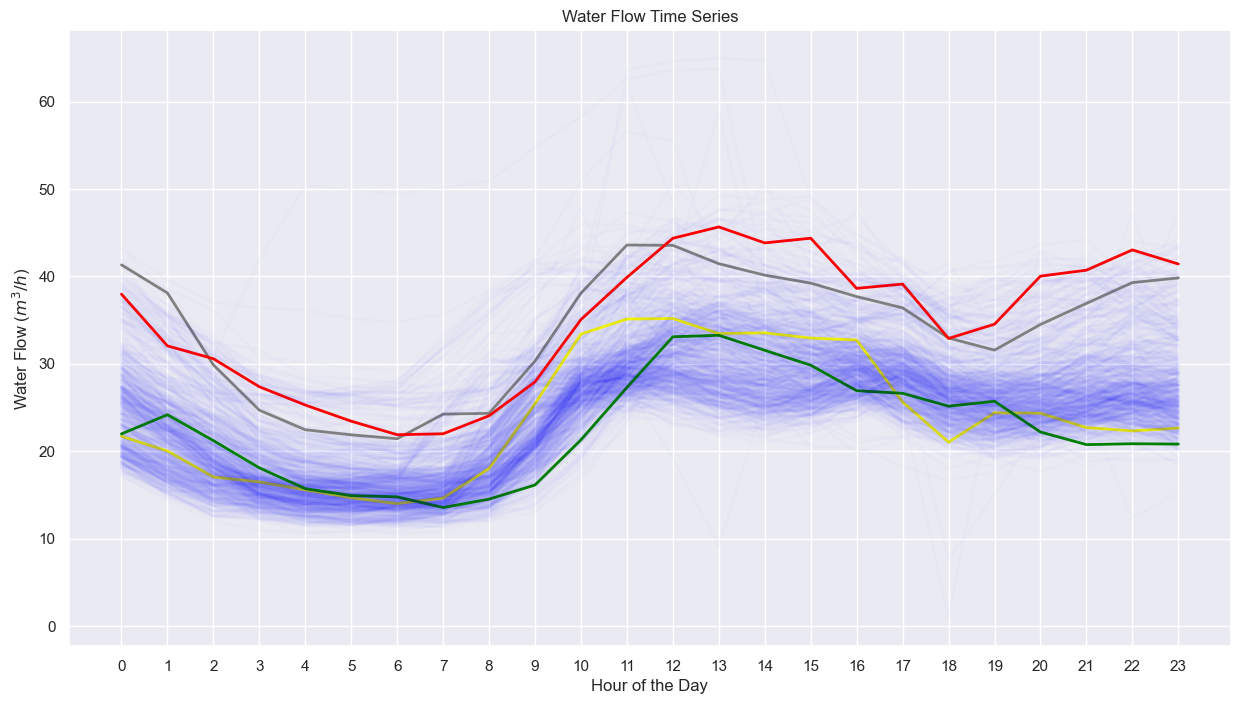

In [128]:
plt.figure(figsize=(15, 8))

# Plot each time series
col = ['blue','red','grey','green','yellow']
for i, (index, row) in enumerate(X.iterrows()):
    if clustering2.labels_[i]==0:
        plt.plot(row,c=col[clustering2.labels_[i]], alpha=0.01,linewidth = 2) #c=clustering2.labels_, cmap='winter'
    else:
        plt.plot(row,c=col[clustering2.labels_[i]], alpha=1,linewidth = 2)
    
plt.title('Water Flow Time Series')
plt.xlabel('Hour of the Day')
plt.ylabel('Water Flow ($m^3/h$)')
plt.show()

In [ ]:
# 2.C Visualization and discussion



# Additional reading

"Comparing different clustering algorithms on toy datasets": https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

### References

- [Kernel PCA for denoising by Lucas Rodés-Guirao et al.](https://github.com/lucasrodes/kPCA-denoising-python/)